In [546]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [547]:
df = pd.read_csv("data/train.csv")

In [548]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [549]:
#X = df.drop('Survived', axis=1)

In [550]:
#y = df['Survived']

In [551]:
df.drop(['Ticket', 'PassengerId'], axis=1, inplace=True)

In [552]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [553]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Overall Chances of Survival 

In [554]:
print("Chance of surviving regardless of any variable: {0:.0f}%".format(sum(df['Survived'])/df['Survived'].count()*100))

Chance of surviving regardless of any variable: 38%


## Passenger Class

Number survived : 
Class 1: 63% survived
Class 2: 47% survived
Class 3: 24% survived


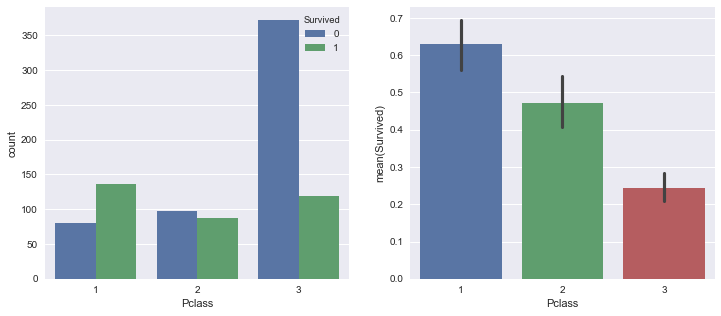

In [555]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.barplot(x=df['Pclass'], y=df['Survived'], ax=ax2)
sns.countplot(x=df['Pclass'], data=df, hue='Survived', ax=ax1)

print("Number survived : ")
for x in np.unique(X['Pclass']):
    print("Class " + str(x) + ": {0:.0f}% survived".format(sum(df.loc[df['Pclass']==x,
            'Survived'])/df.loc[df['Pclass']==x, 'Survived'].count()*100))

## Title 

Total Null Entries in training samples : 0
Number survived : 
Title - Mr: 16% survived
Title - Mrs: 79% survived
Title - Miss: 70% survived
Title - Master: 57% survived
Title - No Title: 44% survived


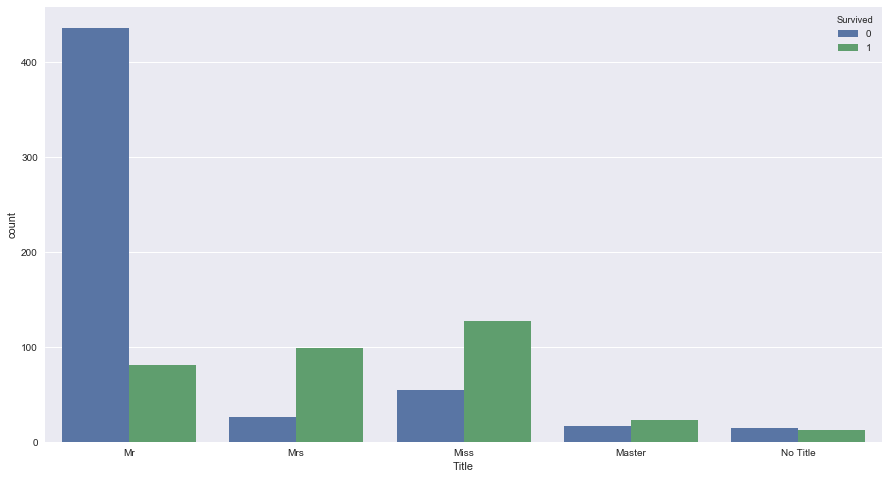

In [556]:
print("Total Null Entries in training samples :", df['Name'].isnull().sum())

#Names doesn't matter much, but the title associated with it may help.
#Extract titles from names
df['Title'] = df["Name"].map(lambda name : name.split(".")[0].split(" ")[-1])

titles = {"Mr" : "Mr", "Mrs" : "Mrs", "Miss" : "Miss", "Master" : "Master"}

df["Title"] = df["Title"].map(titles)
df["Title"].fillna("No Title", inplace=True)

#Data Visualization
fig = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
sns.countplot(data=df, x="Title", hue="Survived")

titleMap = {"Mr" : 0, "Mrs" : 1, "Miss" : 2, "Master" : 3, "No Title" : 4}

#Map titles to nominal values
df["Title"] = df["Title"].map(titleMap)

#Drop names
df.drop('Name', axis=1, inplace=True)

print("Number survived : ") 
for x in np.unique(df['Title']):
    print("Title - " + str([k for k,v in titleMap.items() if v == x])[2:-2] + ": {0:.0f}% survived".format(
        sum(df.loc[df['Title']==x,'Survived'])/df.loc[df['Title']==x, 'Survived'].count()*100))

## Sex 

Total Null Entries in training samples : 0
Number survived : 
Sex - Male: 19% survived
Sex - Female: 74% survived


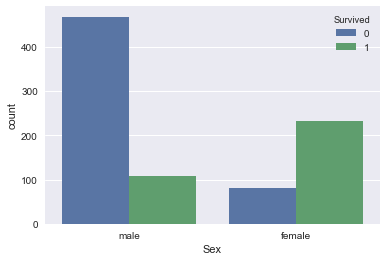

In [557]:
print("Total Null Entries in training samples :", df['Sex'].isnull().sum())

#Data Visualization
sns.countplot(data=df, x="Sex", hue="Survived")

#Map to integer data
df["Sex"] = df["Sex"].map({"male" : 0, "female" : 1})

sexFunction = lambda x: 'Female' if x == 1 else 'Male'

print("Number survived : ")
for x in np.unique(df['Sex']):
    print("Sex - " + str(sexFunction(x)) + ": {0:.0f}% survived".format(
        sum(df.loc[df['Sex']==x,'Survived'])/df.loc[df['Sex']==x, 'Survived'].count()*100))

## Age 

Total Null Entries in training samples : 177
Number survived : 
Age Group - Children: 54% survived
Age Group - Adults: 39% survived
Age Group - Elderly: 34% survived
Age Group - MissingData: 29% survived


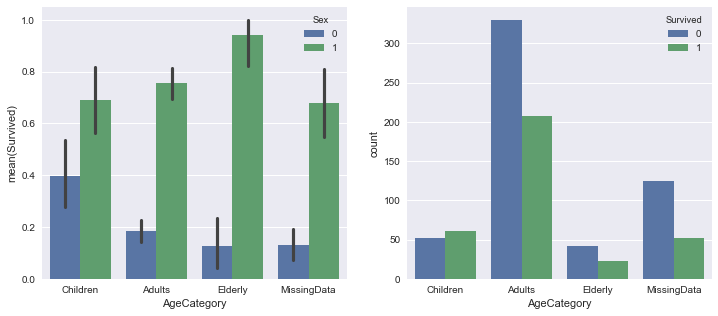

In [558]:
#Number of null values
print("Total Null Entries in training samples :", df['Age'].isnull().sum())

#One of the way to deal with missing values is to replace them with mean of that feature values, 
#but since there are too many null entries, I will be categorizing these entries into 
#labels - [child, adult, old, missingdata]

df["AgeCategory"] = "Adults"
df["AgeCategory"].loc[df["Age"] < 18 ] = "Children"
df["AgeCategory"].loc[df["Age"] > 50 ] = "Elderly"
df["AgeCategory"].loc[df["Age"].isnull()] = "MissingData"

orderList = ["Children", "Adults", "Elderly", "MissingData"]

#Data Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=df, x="AgeCategory", y="Survived", hue='Sex', ax=ax1, order=orderList)
sns.countplot(data=df, x="AgeCategory", hue="Survived", ax=ax2, order=orderList)

ageMap = {"Children" : 0, "Adults" : 1, "Elderly" : 2, "MissingData" : 3}

#Map to integer data
df["AgeCategory"] = df["AgeCategory"].map(ageMap)

#Drop Age
df.drop("Age", axis=1, inplace=True)

print("Number survived : ")
for x in np.unique(df['AgeCategory']):
    print("Age Group - " + str([k for k,v in ageMap.items() if v == x])[2:-2] + ": {0:.0f}% survived".format(
        sum(df.loc[df['AgeCategory']==x,'Survived'])/df.loc[df['AgeCategory']==x, 'Survived'].count()*100))

## Family Size and Alone or with Family 

Number survived : 
Alone or With Family? - Alone: 30% survived
Alone or With Family? - With Family: 51% survived
Number survived : 
Family Size - Small: 30% survived
Family Size - Medium: 56% survived
Family Size - Large: 15% survived


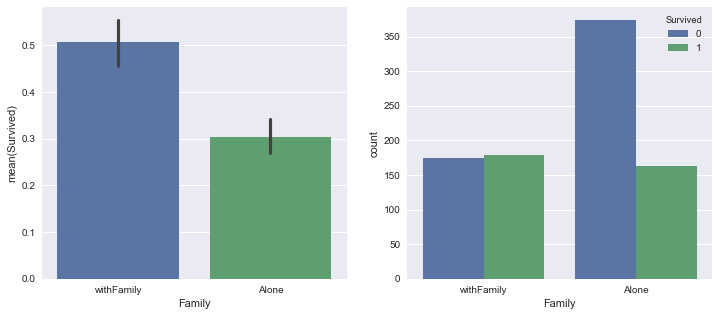

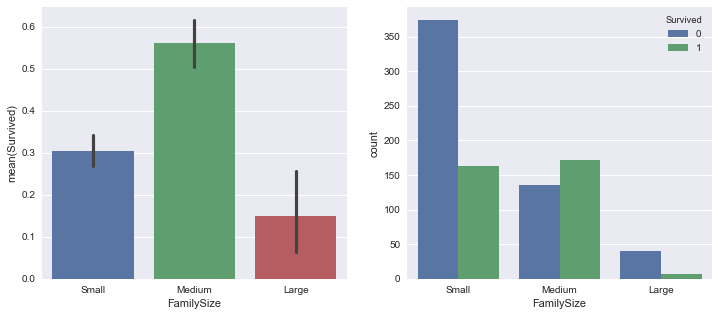

In [559]:
#From sibSp and Parch, we can add whether a person has a family or not.
#Also we will create another feature determining number of family members onboard.

df['Family'] = df['SibSp'] + df['Parch'] + 1
df['FamilySize'] = df['Family']
df['FamilySize'].loc[df['Family'] == 1] = "Small"
df['FamilySize'].loc[df['Family'] > 1] = "Medium"
df['FamilySize'].loc[df['Family'] > 5] = "Large"
df['Family'].loc[df['Family'] > 1] = 'withFamily'
df['Family'].loc[df['Family'] == 1] = 'Alone'

orderList = ["Small", "Medium", "Large"]
familyMap = {"Small" : 0, "Medium" : 1, "Large" : 2}

#Data Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=df, x="Family", y="Survived", ax=ax1)
sns.countplot(data=df, x="Family", hue="Survived", ax=ax2)
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=df, x="FamilySize", y="Survived", ax=ax3, order=orderList)
sns.countplot(data=df, x="FamilySize", hue="Survived", ax=ax4, order=orderList)


#Map to integral values
df["Family"] = df["Family"].map({"Alone" : 0, "withFamily" : 1})
df["FamilySize"] = df["FamilySize"].map(familyMap)

#Drop SibSp and Parch Columns
df.drop(["Parch", "SibSp"], axis=1, inplace=True)

familyFunction = lambda x: 'With Family' if x == 1 else 'Alone'

print("Number survived : ")
for x in np.unique(df['Family']):
    print("Alone or With Family? - " + str(familyFunction(x)) + ": {0:.0f}% survived".format(
        sum(df.loc[df['Family']==x,'Survived'])/df.loc[df['Family']==x, 'Survived'].count()*100))
    
print("Number survived : ")
for x in np.unique(df['FamilySize']):
    print("Family Size - " + str([k for k,v in familyMap.items() if v == x])[2:-2] + ": {0:.0f}% survived".format(
        sum(df.loc[df['FamilySize']==x,'Survived'])/df.loc[df['FamilySize']==x, 'Survived'].count()*100))

## Ticket Price (Fare) 

Total Null Entries in training samples : 0
Number survived : 
Ticket Price - Under $100: 38% survived


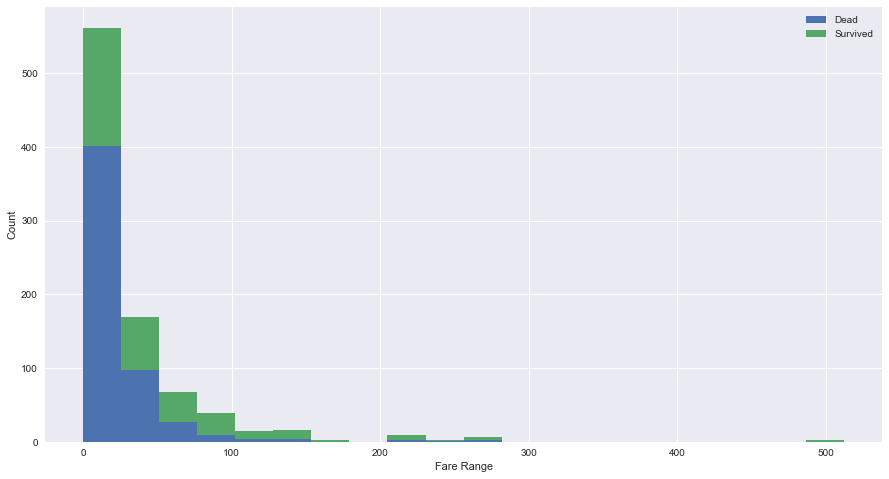

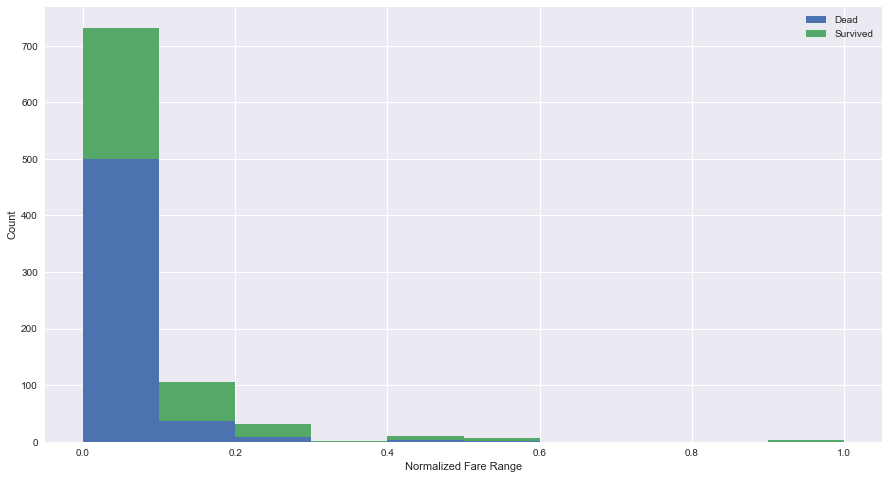

In [560]:
#Number of null values
print("Total Null Entries in training samples :", df['Fare'].isnull().sum())

#Data Visualization
fig = plt.figure(figsize=(15,8))
plt.hist([df[df["Survived"]==0]["Fare"], df[df["Survived"]==1]["Fare"]], 
         stacked=True, bins=20, label=['Dead', 'Survived'])
plt.xlabel("Fare Range")
plt.ylabel("Count")
plt.legend()

#Fare data contains some extreme values which can be normalized
scale = preprocessing.MinMaxScaler()
df['normalizedFare'] = scale.fit_transform(df['Fare'].reshape(-1,1))

#Data Visualization
fig = plt.figure(figsize=(15,8))
plt.hist([df[df["Survived"]==0]["normalizedFare"], df[df["Survived"]==1]["normalizedFare"]], 
         stacked=True, bins=10, label=['Dead', 'Survived'])
plt.xlabel("Normalized Fare Range")
plt.ylabel("Count")
plt.legend()

df["TicketPrice"] = df["normalizedFare"].apply(lambda x: 1 if x > 100 else 0)

df.drop("Fare", axis=1, inplace=True)

fareFunction = lambda x: 'Over $100' if x == 1 else 'Under $100'

print("Number survived : ")
for x in np.unique(df['TicketPrice']):
    print("Ticket Price - " + str(fareFunction(x)) + ": {0:.0f}% survived".format(
        sum(df.loc[df['TicketPrice']==x,'Survived'])/df.loc[df['TicketPrice']==x, 'Survived'].count()*100))

## Embarked 

Total Null Entries in training samples : 2
Most People Embarked from : S
Number survived : 
Embarked from Port S: 34% survived
Embarked from Port C: 55% survived
Embarked from Port Q: 39% survived


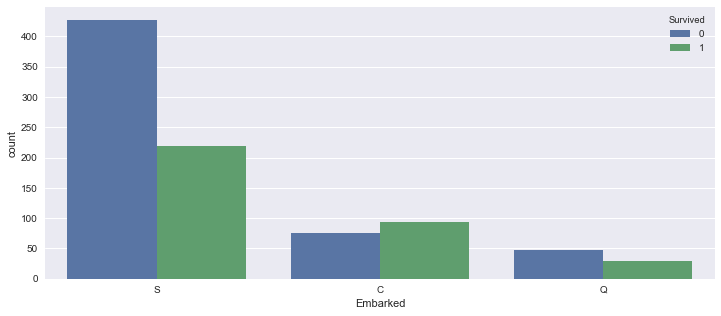

In [561]:
#Number of null values
print("Total Null Entries in training samples :", df['Embarked'].isnull().sum())

#Fill missing values with maximum occurence of embarked category
print("Most People Embarked from :", df['Embarked'].describe()['top'])
df['Embarked'].fillna('S', inplace=True)

embarkedMap = {"S" : 0, "C" : 1, "Q" : 2}

#Data Visualization
fig = plt.subplots(figsize=(12,5))
sns.countplot(data=df, x="Embarked", hue="Survived")

#Map Ports to integral values
df["Embarked"] = df["Embarked"].map(embarkedMap)

print("Number survived : ")
for x in np.unique(df['Embarked']):
    print("Embarked from Port " + str([k for k,v in embarkedMap.items() if v == x])[2:-2] + ": {0:.0f}% survived".format(
        sum(df.loc[df['Embarked']==x,'Survived'])/df.loc[df['Embarked']==x, 'Survived'].count()*100))

In [562]:
df.head()

,Survived,Pclass,Sex,Cabin,Embarked,Title,AgeCategory,Family,FamilySize,normalizedFare,TicketPrice
0,0,3,0,NaN,0,0,1,1,1,0.014151,0
1,1,1,1,C85,1,1,1,1,1,0.139136,0
2,1,3,1,NaN,0,2,1,0,0,0.015469,0
3,1,1,1,C123,0,1,1,1,1,0.103644,0
4,0,3,0,NaN,0,0,1,0,0,0.015713,0


In [564]:
df.drop("Cabin", axis=1, inplace=True)

In [565]:
df.head()

,Survived,Pclass,Sex,Embarked,Title,AgeCategory,Family,FamilySize,normalizedFare,TicketPrice
0,0,3,0,0,0,1,1,1,0.014151,0
1,1,1,1,1,1,1,1,1,0.139136,0
2,1,3,1,0,2,1,0,0,0.015469,0
3,1,1,1,0,1,1,1,1,0.103644,0
4,0,3,0,0,0,1,0,0,0.015713,0


In [566]:
df.to_csv('data/Cleaned Data.csv')